## Project description - Supervised Learning

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

## Data description

Data from the `/datasets/Churn.csv` file:

Features
- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary

Target
- `Exited` — сustomer has left

## Overview of work process

I present here a brief overview of how the data set was processed and analyzed. First, the data needs to be prepared prior to input for training models. Preparation of the data set included filling missing values, label encoding, and feature standardization. From here, models were trained without class balancing to get a sense of baseline metrics of the models. Techniques for class balancing, such as downsampling and upsampling, were used and then the different models were then optimized to find the best model in terms of accuracy for this data set. From this, we can determine the best model, and metrics were generated from the determined best model.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Data Preparation

In [12]:
# Read in the data into df dataframe
df = pd.read_csv('Churn.csv')

In [13]:
# Display information on the dataset
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Thoughts on the data set to prepare for training:
- RowNumber, CustomerId, and Surname columns can be removed and not included as features because of their irrelevance to why someone would leave the bank. We don't want to train the models with these fields.
- Missing values in the 'Tenure' column, will be investigated to determine the best way to address the missing values
- Label encoding for the following columns: 'Geography', 'Gender'
- Columns needing to be standardized or feature scaled: 'CreditScore', 'Age', 'Tenure', 'Balance', and 'EstimatedSalary'

In [14]:
# Remove the RowNumber, CustomerId, and Surname columns
data = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [15]:
# Investigating the Tenure column
print(data['Tenure'].unique())
print(data['Tenure'].mean())

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]
4.997690023099769


Tenure column ranges from 0-10 with a mean value of 5. The missing values represent about 10% of the data. Plan is to fill the missing values with the mean of 5.

In [16]:
# Fill missing 'Tenure' values with the mean and convert to int type
data['Tenure'] = data['Tenure'].fillna(5).astype('int64')

In [17]:
# One hot encoding for the 'Geography' and 'Gender' columns
data_ohe = pd.get_dummies(data, drop_first=True)

In [18]:
# Split data set into features and target
features = data_ohe.drop('Exited', axis=1)
target = data_ohe['Exited']

In [19]:
# Check on the features dataset
features.info()
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000


Confirming that data is transformed to what was expected.

In [20]:
# Splitting the data set into 60% training, 20% validation, and 20% test set
features_train, features_split, target_train, target_split = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_split, target_split, test_size=0.5, random_state=12345)

In [21]:
# Standardize columns
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()

# Fit to training set
scaler.fit(features_train[cols_to_scale])

# Transform to the sets
pd.options.mode.chained_assignment = None
features_train[cols_to_scale] = scaler.transform(features_train[cols_to_scale])
features_valid[cols_to_scale] = scaler.transform(features_valid[cols_to_scale])
features_test[cols_to_scale] = scaler.transform(features_test[cols_to_scale])

In [22]:
# Confirm the splits by printing the sets
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


Next, let's take a look at class balance.

In [23]:
# Printing the number of target = 0, or target = 1
print(df.query("Exited == 0").shape)
print(df.query("Exited == 1").shape)

(7963, 14)
(2037, 14)


The number of 'negative' outcomes (customers staying with the bank) are 4x more than the 'positive' outcomes (customers leaving the bank). There is a class imbalance that will need to be addressed. First, the models will be trained without fixing the class imbalance to get a baseline of the models.

## Initial modeling without fixing class imbalance

In [24]:
# Evaluate data set using decision tree model
# best_score = 0
best_depth = 0
best_f1 = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    # score_valid = model.score(features_valid, target_valid)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth

# Use highest scoring model parameters to calculate metrics
model_best = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_best.fit(features_train, target_train)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Decision Tree best depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

Decision Tree best depth: 6
Accuracy on training set: 0.872, validation set: 0.858, test set: 0.848
Confusion matrix: 
[[1528   54]
 [ 230  188]]
Recall: 0.450, Precision: 0.777, F1: 0.570


In [25]:
# Sanity check with a constant model of all '0's (negative outcomes)
constant_model = pd.Series(0, index=features_valid.index)
score_constant = accuracy_score(constant_model, target_valid)
print(f'Constant model accuracy score: {score_constant:.3f}')

Constant model accuracy score: 0.791


Comments on decision tree without class imbalance adjustments:

At least the trained model has some improvement in the accuracy over the constant model. Also, accuracy is consistent between training, validation, and the test set. Even though the F1 score is close to our target (0.59), there are methods to try to improve this model even more when attempting to fix class imbalance.

Next, let's evaluate the Logistic Regression model.

In [26]:
# Evaluate data set using logistic regression
# best_score = 0
best_solver = ''
solvers = ['lbfgs', 'liblinear', 'newton-cg']
best_f1 = 0
for solv in solvers:
    model = LogisticRegression(random_state=12345, solver=solv)
    model.fit(features_train, target_train)
    # score_valid = model.score(features_valid, target_valid)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1:
        best_f1 = f1
        best_solver = solv

# Use highest scoring model parameters to calculate metrics
model_best = LogisticRegression(random_state=12345, solver=best_solver)
model_best.fit(features_train, target_train)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Logistic Regression best solver: {best_solver}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Logistic Regression best solver: lbfgs
Accuracy on training set: 0.819, validation set: 0.802, test set: 0.791
Confusion matrix: 
[[1506   76]
 [ 320   98]]
Recall: 0.234, Precision: 0.563, F1: 0.331
Constant model accuracy score: 0.791


Comments on logistic regression:

This performed very poorly, with the test set accuracy the same as the constant model. Also, the F1 score is very low with low recall and low precision. Not very good!

Let's move on to the random forest model.

In [27]:
# Evaluate data set using random forest
# best_score = 0
best_est = 0
best_depth = 0
best_f1 = 0
for est in range(20, 81, 10):
    for depth in range(5, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        # score_valid = model.score(features_valid, target_valid)
        predicted = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted)
        if f1 > best_f1:
            best_f1 = f1
            best_depth = depth
            best_est = est

# Use highest scoring model parameters to calculate metrics
model_best = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model_best.fit(features_train, target_train)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Random Forest best n_estimator value: {best_est}, max_depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Random Forest best n_estimator value: 20, max_depth: 9
Accuracy on training set: 0.893, validation set: 0.864, test set: 0.846
Confusion matrix: 
[[1543   39]
 [ 233  185]]
Recall: 0.443, Precision: 0.826, F1: 0.576
Constant model accuracy score: 0.791


Accuracy and metrics with the random forest are similar to the decision tree results. 

## Downsample and Upsample for Class Imbalance

In [28]:
# Printing out the lengths of the negative and positive outcomes for target
print(len(target[target == 0]))
print(len(target[target == 1]))

7963
2037


Downsample the negative class to 25%, and upsample the positive class 4x, and re-evaluate the models in each case.

In [29]:
# Downsample function
def downsample(features, target, fraction):
    # Split features and targets to 1 and 0
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # downsample the negative class in features and concat to rest of features
    features_zeros_downsampled = features_zeros.sample(frac=fraction, random_state=12345)
    features_downsampled = pd.concat([features_zeros_downsampled] + [features_ones])

    # downsample the target and concat to rest of target
    target_zeros_downsampled = target_zeros.sample(frac=fraction, random_state=12345)
    target_downsampled = pd.concat([target_zeros_downsampled] + [target_ones])

    # Shuffle the resulting data
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled)
    return features_downsampled, target_downsampled

# Downsample on the training data set
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

# Print out the resulting lengths to confirm downsampling
print('Positive class length: ', target_train_downsampled[target_train_downsampled == 0].shape)
print('Negative class length: ', target_train_downsampled[target_train_downsampled == 1].shape)

Positive class length:  (1201,)
Negative class length:  (1196,)


In [30]:
# Upsample function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Upsample the positive class by amount given by repeat
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Shuffle the resulting data
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

# Upsample on the training data set
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

# Print out the resulting lengths to confirm upsampling
print('Positive class length: ', target_train_upsampled[target_train_upsampled == 0].shape)
print('Negative class length: ', target_train_upsampled[target_train_upsampled == 1].shape)

Positive class length:  (4804,)
Negative class length:  (4784,)


Lengths for both classes are fairly equal. Now let's train on these data sets.

In [31]:
# Decision tree model on downsampled training data set
best_score = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_downsampled, target_train_downsampled)
    score_valid = model.score(features_valid, target_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_depth = depth

# Use highest scoring model parameters to calculate metrics
model_best = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_best.fit(features_train_downsampled, target_train_downsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Decision Tree with downsampled training set best depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check with a constant model of all '0's (negative outcomes)
print(f'Constant model accuracy score: {score_constant:.3f}')

Decision Tree with downsampled training set best depth: 5
Accuracy on training set: 0.799, validation set: 0.800, test set: 0.810
Confusion matrix: 
[[1307  275]
 [ 125  293]]
Recall: 0.701, Precision: 0.516, F1: 0.594
Constant model accuracy score: 0.791


In [32]:
# Decision tree model on upsampled training data set
best_score = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_upsampled, target_train_upsampled)
    score_valid = model.score(features_valid, target_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_depth = depth

# Use highest scoring model parameters to calculate metrics
model_best = DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_best.fit(features_train_upsampled, target_train_upsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Decision Tree with upsampled training set best depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check with a constant model of all '0's (negative outcomes)
print(f'Constant model accuracy score: {score_constant:.3f}')

Decision Tree with upsampled training set best depth: 5
Accuracy on training set: 0.807, validation set: 0.810, test set: 0.798
Confusion matrix: 
[[1341  241]
 [ 138  280]]
Recall: 0.670, Precision: 0.537, F1: 0.596
Constant model accuracy score: 0.791


Comparing between downsampling and upsampling, there's not significant differences. Accuracy between data sets are similar and F1 is close to equal.

Comparing to not downsampling or upsampling, the overall accuracy decreased from the test set of 0.849 to around 0.8. This accuracy is similar to the constant model. However, the F1 score improved slightly from 0.570 to 0.596.

Overall, the parameters used here for a Decision Tree model indicates that this may not be a good model to use for this particular data set based on the metrics.

Next section is on training Logistic Regression model with the downsampled or upsampled training data set.

In [33]:
# Logistic regression with downsampled training data set
best_score = 0
best_solver = ''
solvers = ['lbfgs', 'liblinear', 'newton-cg']
for solv in solvers:
    model = LogisticRegression(random_state=12345, solver=solv)
    model.fit(features_train_downsampled, target_train_downsampled)
    score_valid = model.score(features_valid, target_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_solver = solv

# Use highest scoring model parameters to calculate metrics
model_best = LogisticRegression(random_state=12345, solver=best_solver)
model_best.fit(features_train_downsampled, target_train_downsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Logistic Regression with downsampled training data set best solver: {best_solver}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Logistic Regression with downsampled training data set best solver: lbfgs
Accuracy on training set: 0.716, validation set: 0.701, test set: 0.699
Confusion matrix: 
[[1120  462]
 [ 137  281]]
Recall: 0.672, Precision: 0.378, F1: 0.484
Constant model accuracy score: 0.791


In [34]:
# Logistic regression with upsampled training data set
best_score = 0
best_solver = ''
solvers = ['lbfgs', 'liblinear', 'newton-cg']
for solv in solvers:
    model = LogisticRegression(random_state=12345, solver=solv)
    model.fit(features_train_upsampled, target_train_upsampled)
    score_valid = model.score(features_valid, target_valid)
    if score_valid > best_score:
        best_score = score_valid
        best_solver = solv

# Use highest scoring model parameters to calculate metrics
model_best = LogisticRegression(random_state=12345, solver=best_solver)
model_best.fit(features_train_upsampled, target_train_upsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Logistic Regression with upsampled data set best solver: {best_solver}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Logistic Regression with upsampled data set best solver: lbfgs
Accuracy on training set: 0.718, validation set: 0.702, test set: 0.698
Confusion matrix: 
[[1119  463]
 [ 133  285]]
Recall: 0.682, Precision: 0.381, F1: 0.489
Constant model accuracy score: 0.791


Again, the metrics between downsampled or upsampled data this time on a logistic regression model were similar in terms of the overall accuracy of the test set and the F1 metric. We also see a decrease in the accuracy compared to not balancing the classes, yet the F1 metric has increased. So far, this model is the worse as the accuracy is lower than the constant model score.

Time to train the downsampled or upsampled data on a Random Forest model.

In [35]:
# Random forest with downsampled data
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 81, 10):
    for depth in range(5, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_downsampled, target_train_downsampled)
        score_valid = model.score(features_valid, target_valid)
        if score_valid > best_score:
            best_score = score_valid
            best_depth = depth
            best_est = est

# Use highest scoring model parameters to calculate metrics
model_best = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model_best.fit(features_train_downsampled, target_train_downsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Random Forest with downsampled training data best n_estimator value: {best_est}, max_depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Random Forest with downsampled training data best n_estimator value: 10, max_depth: 5
Accuracy on training set: 0.798, validation set: 0.794, test set: 0.783
Confusion matrix: 
[[1276  306]
 [ 106  312]]
Recall: 0.746, Precision: 0.505, F1: 0.602
Constant model accuracy score: 0.791


In [36]:
# Random forest with upsampled data
best_score = 0
best_est = 0
best_depth = 0
for est in range(10, 81, 10):
    for depth in range(5, 10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train_upsampled, target_train_upsampled)
        score_valid = model.score(features_valid, target_valid)
        if score_valid > best_score:
            best_score = score_valid
            best_depth = depth
            best_est = est

# Use highest scoring model parameters to calculate metrics
model_best = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model_best.fit(features_train_upsampled, target_train_upsampled)

# Scoring accuracy on the different sets
score_train = model_best.score(features_train, target_train)
score_valid = model_best.score(features_valid, target_valid)
score_test = model_best.score(features_test, target_test)

# Calculating metrics
predicted_valid = model_best.predict(features_valid) 
cf_matrix = confusion_matrix(target_valid, predicted_valid) # confusion matrix
recall = recall_score(target_valid, predicted_valid) # recall
precision = precision_score(target_valid, predicted_valid) # precision
f1_sc = f1_score(target_valid, predicted_valid) # F1 score

# Print output
print(f'Random Forest with upsampled training data best n_estimator value: {best_est}, max_depth: {best_depth}')
print(f'Accuracy on training set: {score_train:.3f}, validation set: {score_valid:.3f}, test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

# Sanity check of the constant model
print(f'Constant model accuracy score: {score_constant:.3f}')

Random Forest with upsampled training data best n_estimator value: 70, max_depth: 9
Accuracy on training set: 0.889, validation set: 0.826, test set: 0.811
Confusion matrix: 
[[1355  227]
 [ 122  296]]
Recall: 0.708, Precision: 0.566, F1: 0.629
Constant model accuracy score: 0.791


Optimizing for random forest with the upsampled data seems to have the best result. The accuracy of the test set is higher than the constant model. And the F1 score has increased to above the target goal of 0.59.

## Best model - Random Forest

The best model to predict whether customers will leave the bank will be displayed below, from the optimized parameters explored and described above.

In [37]:
# Training best model
model_best = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=9)
model_best.fit(features_train_upsampled, target_train_upsampled)
predicted_test = model_best.predict(features_test) 

# Scoring accuracy on test set
score_test = accuracy_score(target_test, predicted_test)

# Calculating metrics on the test set
cf_matrix = confusion_matrix(target_test, predicted_test) # confusion matrix
recall = recall_score(target_test, predicted_test) # recall
precision = precision_score(target_test, predicted_test) # precision
f1_sc = f1_score(target_test, predicted_test) # F1 score

# Print output
print(f'Accuracy on test set: {score_test:.3f}')
print(f'Confusion matrix: \n{cf_matrix}')
print(f'Recall: {recall:.3f}, Precision: {precision:.3f}, F1: {f1_sc:.3f}')

Accuracy on test set: 0.811
Confusion matrix: 
[[1331  246]
 [ 131  292]]
Recall: 0.690, Precision: 0.543, F1: 0.608


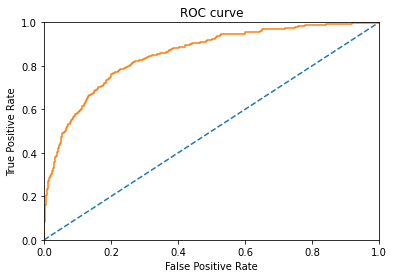

In [38]:
# Plotting ROC curve for the best model
probabilities_valid = model_best.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)
plt.figure()
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [39]:
# Calculate AUC-ROC
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print(f'AUC-ROC is: {auc_roc}')

AUC-ROC is: 0.8531655550908374


## Results and discussion

The best model was determined to be a random forest model and the quality was improved by upsampling the data and improving the class imbalance. 

The resulting metrics had an accuracy of 0.811, F1 score of 0.608, and AUC-ROC of 0.853.

F1 score is a score that ranges from 0 to 1, where 0 is the worse and 1 is the best possible score. It is evaluated from both the recall and precision metrics. It was achieved to have a F1 score greater than 0.59 as the target.

AUC-ROC or aurea under the curve for receiver operating characteristic, this score ranges from 0.5 to 1, where 0.5 means the model is as good as random, and where 1 is the best score. This metric is the relationship between the true positive rate (TPR) and the false positive rate (FPR) of the model. Having a AUC-ROC of 0.853 means that our model is better than random, but not perfect.